In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cms=pd.read_csv('DA data.csv',encoding="ISO-8859-1")

In [3]:
cms.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
cms.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
cms.dropna(axis=0, subset=['CustomerID'],inplace=True) # Removing rows where customer id is NaN

In [7]:
cms['CustomerID']=cms['CustomerID'].astype(int) #Convertng customer id to int type from float

In [8]:
cms['InvoiceDate']=pd.to_datetime(cms['InvoiceDate'], dayfirst=True)# Converting Invoice date to date time format

In [9]:
cms.reset_index(drop=True) # Resetting the index after removing NaN values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France


In [10]:
cms.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France


Text(0, 0.5, 'Visits')

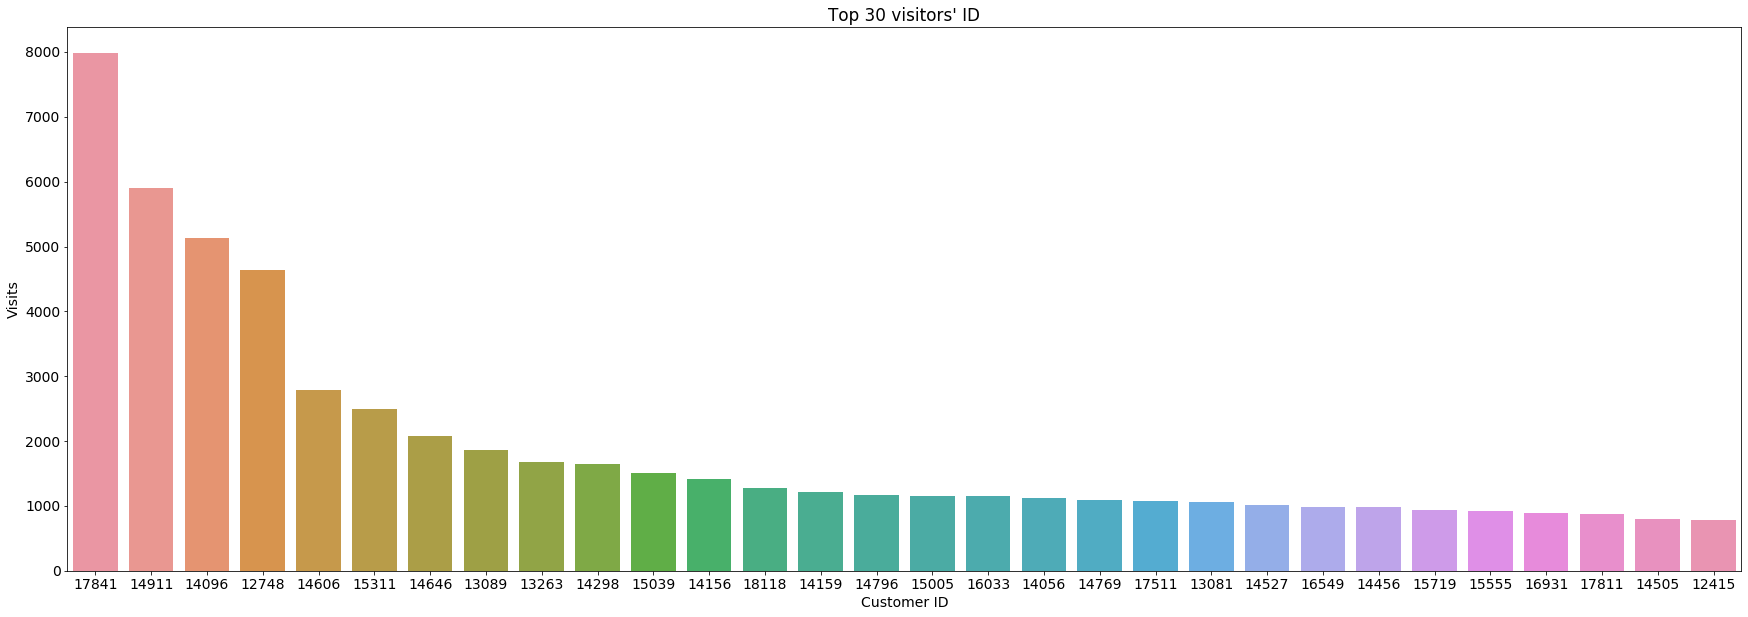

In [11]:
# Top 20 visitors of store by Customer Id

vis=cms['CustomerID'].value_counts().head(30)
plt.figure(figsize=(30,10))
plt.rc('font', size=14) # Change font size
sns.barplot(x=vis.index,y=vis, order=vis.index)
plt.title("Top 30 visitors' ID")
plt.xlabel('Customer ID')
plt.ylabel('Visits')

In [12]:
cms['TotalExpense']=cms['UnitPrice'] * cms['Quantity'] # Finding total expense on a product (UnitPrice * Quantity)
cms.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpense
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.3


In [13]:
cms_ve=cms[cms['TotalExpense']<=0] # Selecting all the -ve values or expenses
cms=cms[cms['TotalExpense']>0] # Selecting all the +ve values or sales

Text(0, 0.5, 'Expense')

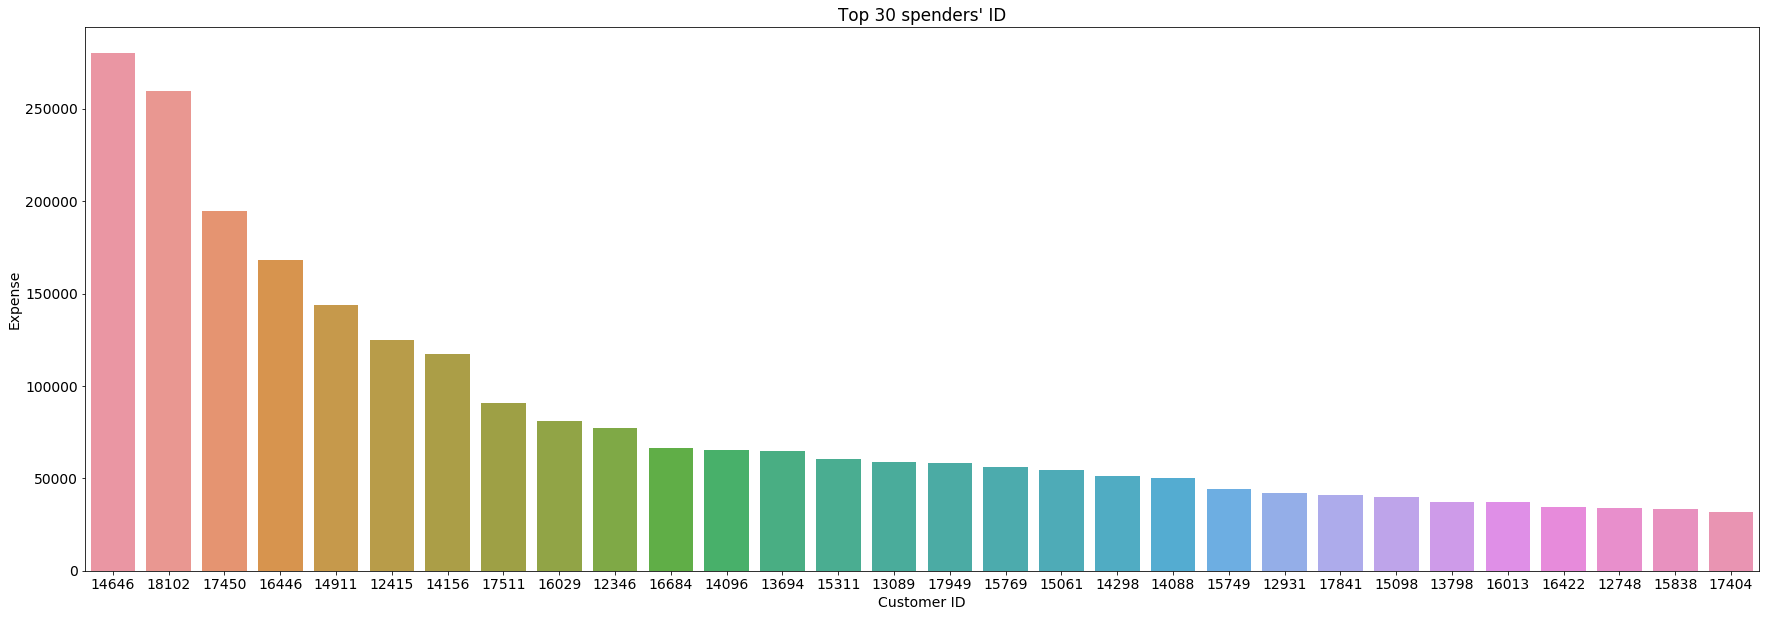

In [14]:
# Find the top spenders at store
spen=cms.groupby('CustomerID').sum()['TotalExpense'].sort_values(ascending=False)[:30]
plt.figure(figsize=(30,10))
plt.rc('font', size=14)
sns.barplot(x=spen.index,y=spen, order=spen.index)
plt.title("Top 30 spenders' ID")
plt.xlabel('Customer ID')
plt.ylabel('Expense')

In [15]:
# Creating a column with month date only
cms['month_year'] = pd.to_datetime(cms['InvoiceDate']).dt.strftime('%Y-%m')
cms.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpense,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.3,2010-01


In [16]:
# Country and monthwise total sales
country_exp=cms.groupby(['Country','month_year']).sum()['TotalExpense'].unstack()
country_exp.fillna(0, inplace=True)
country_exp

month_year,2010-01,2010-02,2010-03,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-12,...,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,,,,,,,,,
Australia,358.25,0.00,0.00,0.00,0.00,0.00,258.90,0.00,0.00,415.70,...,17388.33,601.440,29782.72,33020.91,5224.330,22302.04,2228.210,81.60,6104.30,1083.92
Austria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,277.20,...,1708.12,680.780,1083.58,165.85,707.090,2199.28,0.000,1043.78,1329.78,484.86
Bahrain,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,89.00,0.00,0.000,0.00,459.400,0.00,0.00,0.00
Belgium,0.00,0.00,346.10,0.00,0.00,0.00,0.00,0.00,0.00,1463.81,...,3006.76,3282.330,2984.72,4055.61,3373.920,2347.64,3988.760,5940.29,4438.24,1393.17
Brazil,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1143.600,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00
Canada,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,140.54,534.240,0.00,1171.46,550.940,51.56,0.000,0.00,1217.64,0.00
Channel Islands,0.00,0.00,0.00,0.00,0.00,0.00,0.00,363.53,0.00,0.00,...,0.00,293.000,3166.64,3363.17,0.000,4137.22,2900.110,1966.45,211.63,0.00
Cyprus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1590.82,...,1109.32,196.350,0.00,0.00,2594.350,0.00,196.350,4554.52,460.89,547.50
Czech Republic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.00,0.00,277.480,0.00,0.000,0.00,0.00,0.00


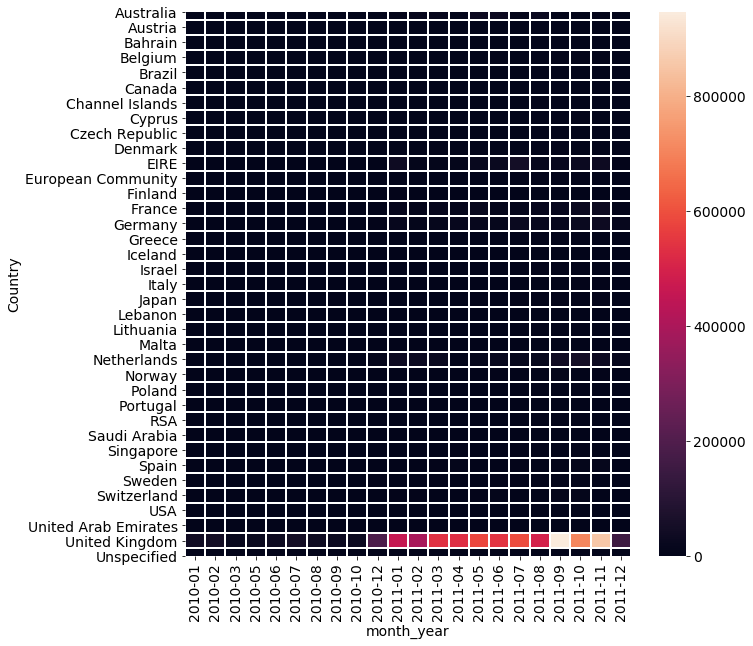

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data=country_exp, linewidths=1,linecolor='white')

In [18]:
# Here we can see that the sales in united kingdom is the highest everymonth. So, united kingdom is the biggest market
    #of our stores.
# While in coutries like RSA, Lebnon, saudi arabia, UAE, Lithuani etc. the sales a very low.

In [19]:
cms.groupby('Description').sum()['Quantity'].sort_values(ascending=False)[:50]

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
ASSORTED COLOUR BIRD ORNAMENT          35362
PACK OF 72 RETROSPOT CAKE CASES        33693
POPCORN HOLDER                         30931
RABBIT NIGHT LIGHT                     27202
MINI PAINT SET VINTAGE                 26076
PACK OF 12 LONDON TISSUES              25345
PACK OF 60 PINK PAISLEY CAKE CASES     24264
BROCADE RING PURSE                     22963
VICTORIAN GLASS HANGING T-LIGHT        22433
ASSORTED COLOURS SILK FAN              21876
RED  HARMONICA IN BOX                  20975
JUMBO BAG PINK POLKADOT                20165
SMALL POPCORN HOLDER                   18252
LUNCH BAG RED RETROSPOT                17697
60 TEATIME FAIRY CAKE CASES            17689
JUMBO BAG STRAWBERRY                   16807
HEART OF WICKER SMALL                  1677

Text(0, 0.5, 'Quantity sold')

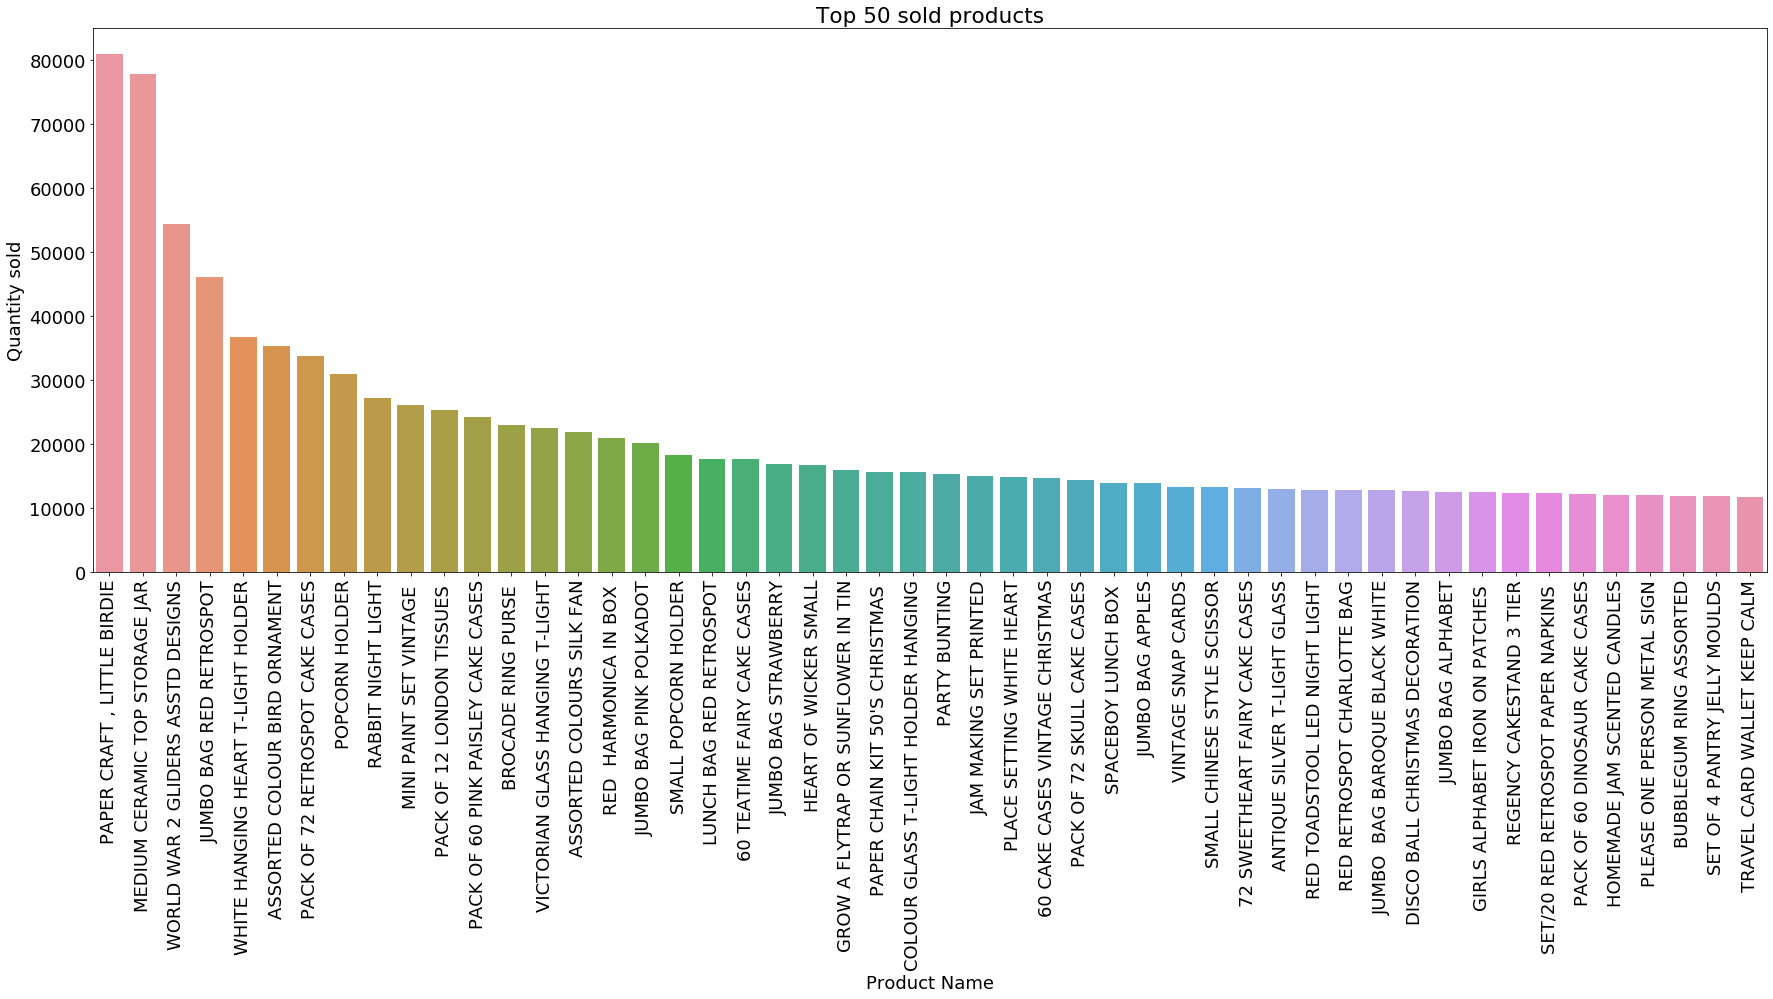

In [20]:
prod=cms.groupby('Description').sum()['Quantity'].sort_values(ascending=False)[:50]
plt.figure(figsize=(30,10))
plt.rc('font', size=18)
sns.barplot(x=prod.index, y=prod)
plt.title("Top 50 sold products")
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Quantity sold')

In [21]:
# These are the most sold products from our stores across countries. Most of the products sold are of home decor
# category that means people buy home-decor products more than anything so our stores should focus on this section and 
# try to provide variety in this section.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

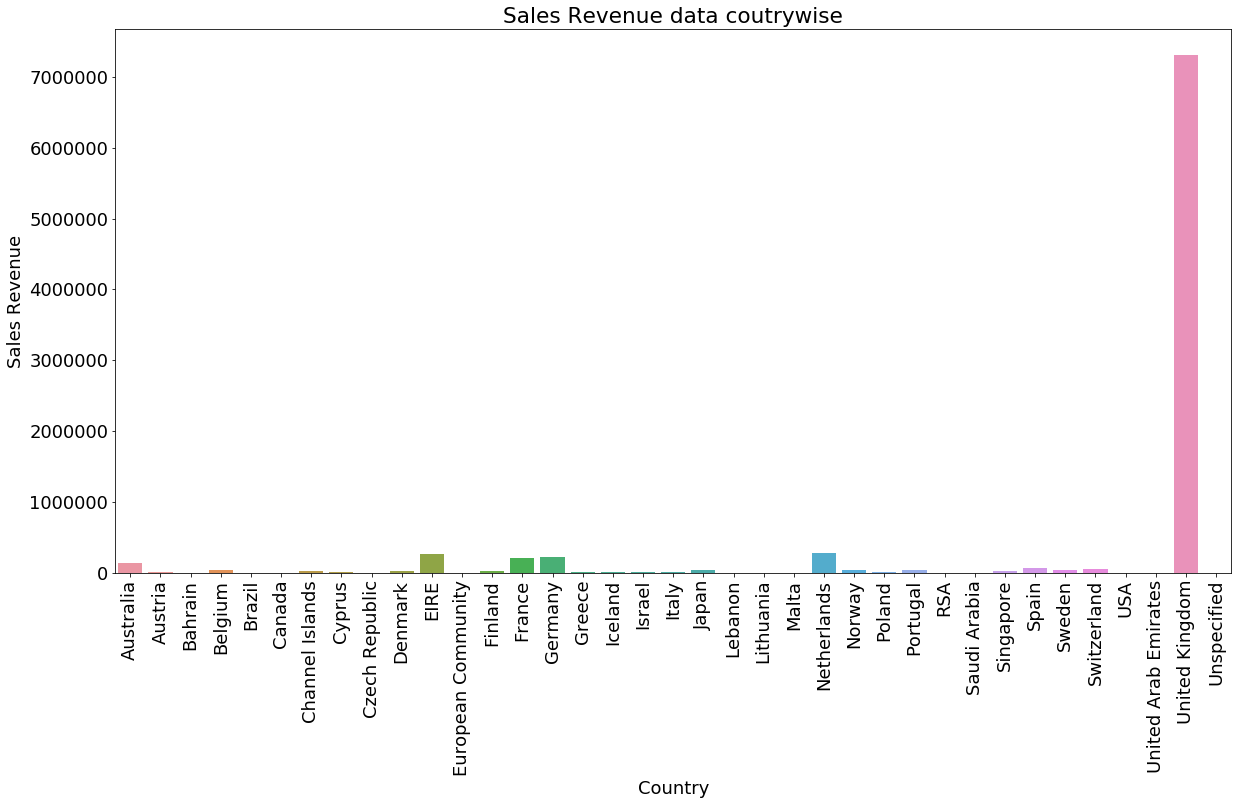

In [22]:
plt.figure(figsize=(20,10))
rev=cms.groupby('Country').sum()['TotalExpense']
sns.barplot(x=rev.index, y=rev)
plt.xlabel('Country')
plt.ylabel('Sales Revenue')
plt.title('Sales Revenue data coutrywise')
plt.xticks(rotation=90)

In [23]:
# Above data tells us that our maximum sales was in united kingdom followed by netherlands, EIRE, Germany and france

In [24]:
cms['month']= pd.DatetimeIndex(cms['InvoiceDate']).month # Adding a month only column

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

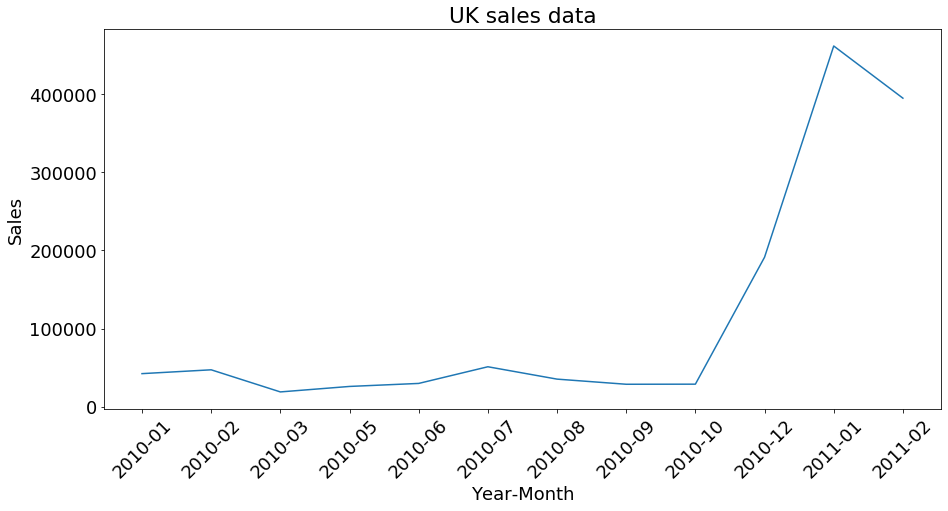

In [25]:
# Since UK is the country with highest sales so let's see the mothly varation of sales there
plt.figure(figsize=(15,7))
uk_sales=cms[cms['Country']=='United Kingdom'].groupby('month_year').sum()['TotalExpense'][:12]#12 to remove last value
# as the last month has very few entries.
sns.lineplot(x=uk_sales.index, y=uk_sales)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('UK sales data')
plt.xticks(rotation=45)

In [26]:
# Great the sales seems to increasing at the end year 2011

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

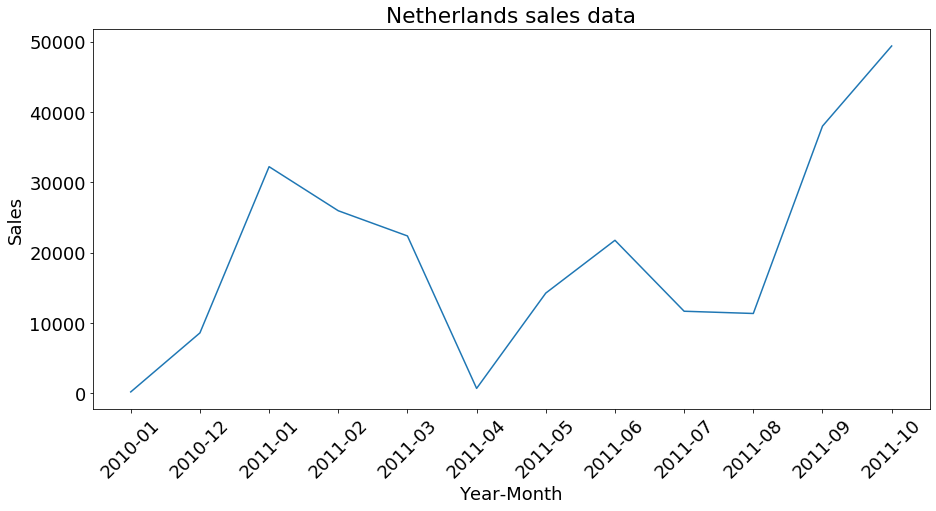

In [27]:
# Let's check for Netherlands
plt.figure(figsize=(15,7))
ne_sales=cms[cms['Country']=='Netherlands'].groupby('month_year').sum()['TotalExpense'][:12]#12 to remove last value
# as the last month has very few entries.
sns.lineplot(x=ne_sales.index, y=ne_sales)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Netherlands sales data')
plt.xticks(rotation=45)

In [28]:
# Here the sales are quiet rumbly and company should first focus on existing stores.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

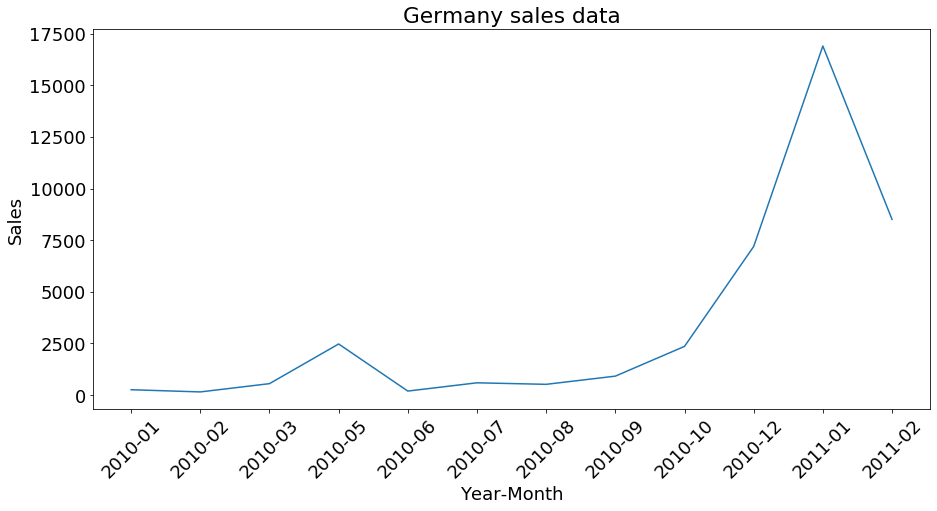

In [29]:
# Let's check for Germany now
plt.figure(figsize=(15,7))
ge_sales=cms[cms['Country']=='Germany'].groupby('month_year').sum()['TotalExpense'][:12]#12 to remove last value
# as the last month has very few entries.
sns.lineplot(x=ge_sales.index, y=ge_sales)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Germany sales data')
plt.xticks(rotation=45)

In [30]:
# Germany is doing better than netherlands but here too focus on existing stores.
# All three major locations are showing the trajectory of growth after 2 nd half of year 2011

In [31]:
# To manipulate output size
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

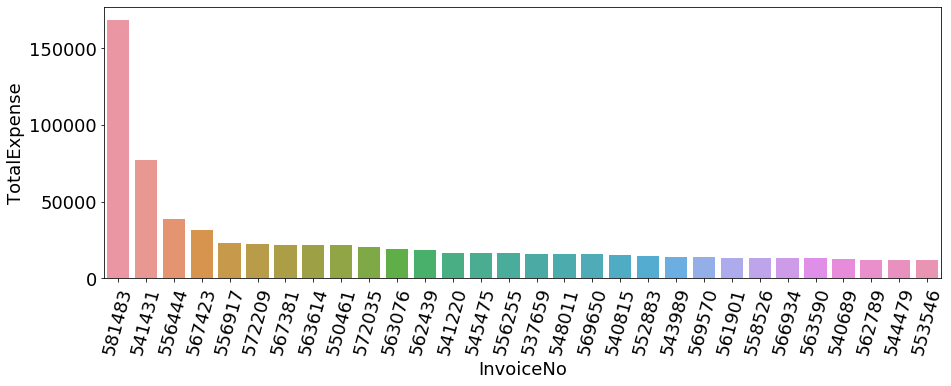

In [32]:
# Maximum sales revenue on a single invoice number (Top 30)

invoice=cms.groupby(['InvoiceNo']).sum()['TotalExpense'].sort_values(ascending=False).reset_index()[:30]
plt.figure(figsize=(15,5))
sns.barplot(x=invoice['InvoiceNo'], y=invoice['TotalExpense'], order=invoice['InvoiceNo'])
plt.xticks(rotation=75)

In [33]:
# Sales versus invoices analysis.
sales=cms.groupby(['Country']).sum()['TotalExpense'].reset_index()
inv=cms.groupby(['Country'])['InvoiceNo'].nunique().reset_index()
sales_inv=pd.merge(sales,inv)
sales_inv['ratio']=sales_inv['TotalExpense']/sales_inv['InvoiceNo']
sales_inv

,Country,TotalExpense,InvoiceNo,ratio
0,Australia,1.385213e+05,57,2430.198421
1,Austria,1.019868e+04,17,599.922353
2,Bahrain,5.484000e+02,2,274.200000
3,Belgium,4.119634e+04,98,420.370816
4,Brazil,1.143600e+03,1,1143.600000
5,Canada,3.666380e+03,6,611.063333
6,Channel Islands,2.045044e+04,26,786.555385
7,Cyprus,1.359038e+04,16,849.398750
8,Czech Republic,8.267400e+02,2,413.370000
9,Denmark,1.895534e+04,18,1053.074444


Text(0, 0.5, 'Sales/bill ratio')

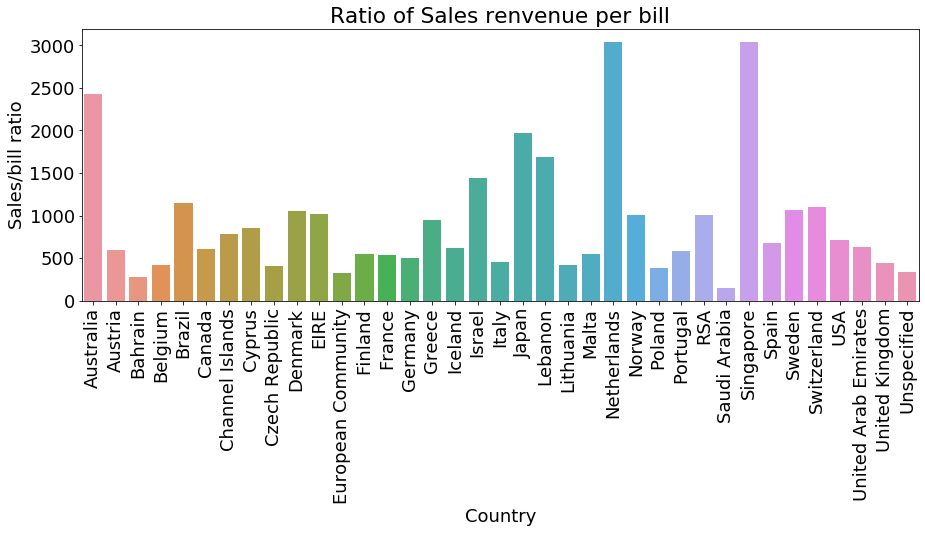

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x=sales_inv['Country'],y=sales_inv['ratio'])
plt.xticks(rotation=90)
plt.title('Ratio of Sales renvenue per bill')
plt.ylabel('Sales/bill ratio')

In [35]:
# The above graph clearly shows the ration of sales revenue per bill , means average of how much sales do our stores
# in various countries makes on a bill.
# Now the things to notice here are :
# 1. The higher(Taller) the bars the higher the sales per bill our store make in those particular country.
# 2. The lower(Smaller) the bars the lesser the sales per bill our stores make in those particular country.
# 3. You already noticed above that the United kingdom was the country where our stores made most of the sales revenue
#    but here you can see eventhough the sales was maximum there but the sales per bill is very low which means that 
#    people here buy lesser things from our stores in general. This could be because we have tougher comptetion in UK
#    so here i would recommend on improving quality and reducing margins to attract customers.
# 4. But countries like australia, netherlands, singpore, japan etc. buy more things in one visit. but our sales are 
#    still low there, it's probably because we have lesser number of stores there. So, we should focus on increasing 
#    our stores at these locations.

In [37]:
cms['day']= pd.DatetimeIndex(cms['InvoiceDate']).day_name()# Adding the day name.

Text(0.5, 0, 'Day')

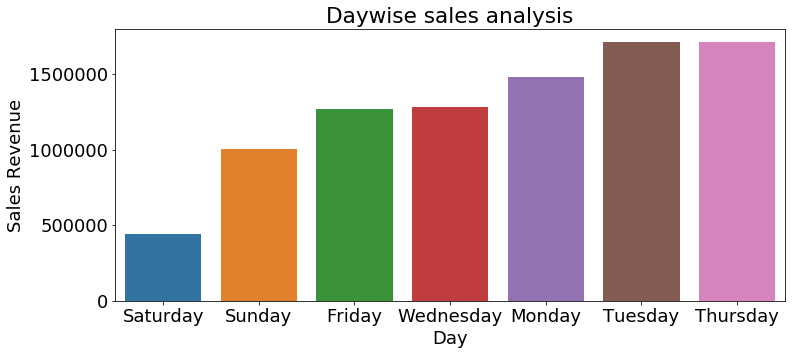

In [38]:
# Checking the relation of day and sales
day_sal=cms.groupby(['day']).sum()['TotalExpense'].sort_values()
plt.figure(figsize=(12,5))
sns.barplot(day_sal.index, day_sal)
plt.title('Daywise sales analysis')
plt.ylabel('Sales Revenue')
plt.xlabel('Day')

In [39]:
# From above chart we can clearly see that the sales in saturday and sunday are the lowest. This data is summary of all
# the coutries on the list. Probable reason for this could be that these days are the holidays and people want to 
# rest at their homes so we can focus at these days by providing some kind of discout or offer to attract people on 
# These days of week. Primarily focusing on saturday would be a great idea.
# While tuesday and thurday are most crowded days so here you can think of ripping profits.

## RFM analysis (Recency, Frequency, Monetry)

In [57]:
# Creating required table for analysis.
bills=cms.groupby(['CustomerID'])['InvoiceNo'].nunique()
recent=cms.groupby(['CustomerID']).max()['InvoiceDate']
freq=cms.groupby(['CustomerID']).sum()['TotalExpense']
cms_rfm=pd.merge(pd.merge(bills,recent,on='CustomerID'),freq,on='CustomerID').reset_index()

In [64]:
# Sorting by date
cms_rfm=cms_rfm.sort_values(['InvoiceDate'], ascending=False).reset_index(drop=True)

In [73]:
# Assigning values acoording to recency
cms_rfm['Recency (R)']=3-np.floor((3*cms_rfm.index)/cms_rfm.shape[0])

In [76]:
# Sorting by number of bills per customer
cms_rfm=cms_rfm.sort_values(['InvoiceNo'], ascending=False).reset_index(drop=True)

In [77]:
# Assigning values acoording to frequency
cms_rfm['Frequency (F)']=3-np.floor((3*cms_rfm.index)/cms_rfm.shape[0])

In [80]:
# Sorting by monetary value
cms_rfm=cms_rfm.sort_values(['TotalExpense'], ascending=False).reset_index(drop=True)

In [81]:
# Assigning values acoording to monetary value
cms_rfm['Monetary (M)']=3-np.floor((3*cms_rfm.index)/cms_rfm.shape[0])

In [83]:
# Calculating RFM score using formula: Recency*100+Frequency*10+Monetary*1
cms_rfm['R*100+F*10+M*1']=(cms_rfm['Recency (R)']*100)+(cms_rfm['Frequency (F)']*10)+(cms_rfm['Monetary (M)']*1)

In [84]:
cms_rfm

,CustomerID,InvoiceNo,InvoiceDate,TotalExpense,Recency (R),Frequency (F),Monetary (M),R*100+F*10+M*1
0,14646,73,2011-12-08 12:36:00,280206.02,3.0,3.0,3.0,333.0
1,18102,60,2011-11-28 12:55:00,259657.30,3.0,3.0,3.0,333.0
2,17450,46,2011-12-07 09:04:00,194550.79,3.0,3.0,3.0,333.0
3,16446,2,2011-09-12 09:15:00,168472.50,2.0,2.0,3.0,223.0
4,14911,201,2011-12-10 14:08:00,143825.06,3.0,3.0,3.0,333.0
...,...,...,...,...,...,...,...,...
4333,16878,1,2011-09-16 17:39:00,13.30,2.0,1.0,1.0,211.0
4334,17956,1,2011-04-04 13:47:00,12.75,1.0,1.0,1.0,111.0
4335,16454,2,2011-10-26 11:40:00,6.90,2.0,2.0,1.0,221.0
4336,14792,1,2011-07-10 09:19:00,6.20,1.0,1.0,1.0,111.0
